In [465]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [213]:
r=11
T=2**(r-2)
M=281
T

512

Последовательность

In [650]:
def sequence(n):
    r=11
    T=2**(r-2)
    M=281
    A = [0]*n
    z=[0]*n
    count_T=math.ceil(n/T)

    for j in range(0,count_T):
        start=T*j
        A[start]=1
        z[start]=A[start]*(2**(-r))
        if n-T*j>T:
            end=T*(j+1)
        else:
            end=n
        #print(start, end)
        for i in range(start+1,end):
            A[i]=A[i-1]*M%(2**(r))
            z[i]=A[i]*(2**(-r))
    #print(A,'\n',z)
    return (z)


In [ ]:
Оценка мат.ожидания и дисперсиии

In [217]:
mean=sum(z)/n
deviations = sum((xi - mean) ** 2 for xi in z) / len(z)
print(mean,'\n',deviations)

0.49975390625 
 0.0834002785644531


Проверка равномерности распределения

In [239]:
count_K=10
p=[]
K=0
for i in range(0,count_K):
    
    for j in range (len(z)): 
        if z[j]>i/count_K and z[j]<=(i+1)/count_K:
            K+=1
    p.append(K/n)
    K=0
print(p)


[0.1, 0.102, 0.097, 0.101, 0.099, 0.101, 0.1, 0.099, 0.103, 0.098]


In [ ]:
fig, ax = plt.subplots(figsize =(5,12))
plt.hist(z,)

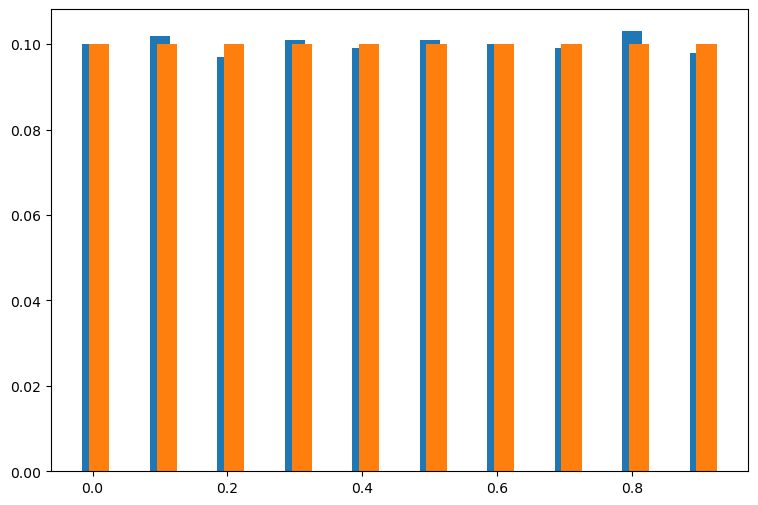

In [304]:
theory=[0.1]*count_K
len_x=np.arange(0, 1, 0.1)
x1= len_x 
x2=len_x+0.01
y1 =p
y2 =theory

fig, ax = plt.subplots()

ax.bar(x1, y1, width=0.03 )
ax.bar(x2, y2, width=0.03)
fig.set_figwidth(9)   
fig.set_figheight(6)    

plt.show()


Проверка статистической независимости базовой
случайной величины

In [333]:
def independence(s,n):
    z=sequence(n)
    count_Zs=0
    for i in range(0,n-s):
        count_Zs+=z[i]*z[i+s]
    return ((12*count_Zs/(n-s))-3)
        

In [334]:
s1=2
s2=5
s3=10
n=[100,500,1000, 1500,2000]
R1=[0]*len(n)
R2=[0]*len(n)
R3=[0]*len(n)
for i in range(len(n)):
    R1[i]=independence(s1, n[i])
    R2[i]=independence(s2,n[i])
    R3[i]=independence(s3, n[i])
print(R1, '\n', R2,'\n', R3)
print('\n')
    

[0.17332760168581585, -0.01806235026164238, -0.024182334930481275, -0.020749143032588346, -0.022556708739684517] 
 [0.09589591779206907, -0.12020463076504795, -0.1256161627457968, -0.1282745992858274, -0.13487282229545405] 
 [0.40226573944091815, 0.02663246855443857, 0.025373464642148846, 0.01976808253550688, 0.01472957841115985]




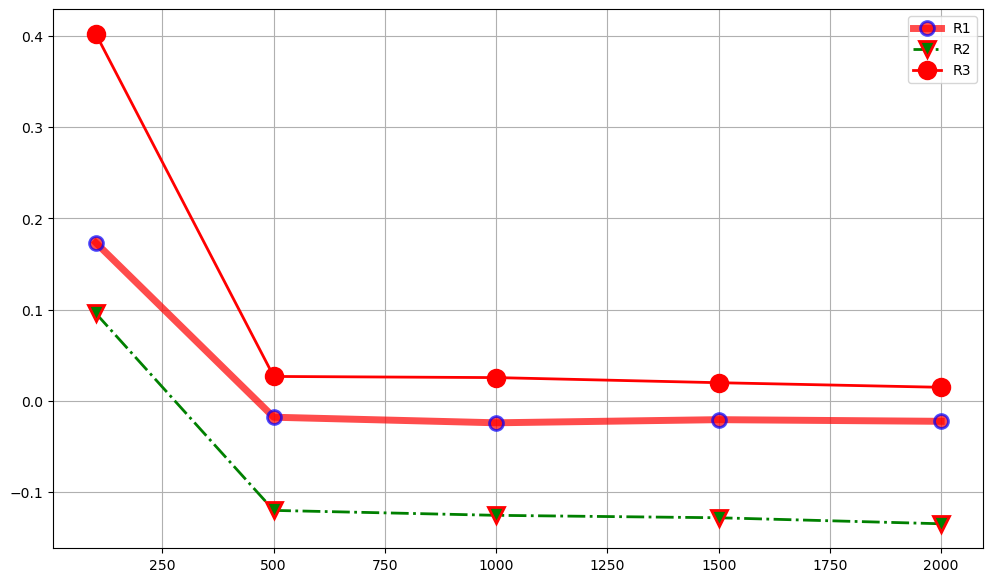

In [335]:
plt.figure(figsize=(12, 7))
plt.plot(n, R1, 'o-r', alpha=0.7, label="R1", lw=5, mec='b', mew=2, ms=10)
plt.plot(n, R2, 'v-.g', label="R2", mec='r', lw=2, mew=2, ms=12)
plt.plot(n, R3, 'o-r', label="R3", mec='r', lw=2, mew=2, ms=12)
plt.legend()
plt.grid(True)

In [310]:
N=math.ceil(n/T)
Au = [0]*n
zu=[0]*n
for j in range(0,count_T):
    start=T*j
    Au[start]=1
    zu[start]=Au[start]*(2**(-r))
    if n-T*j>T:
        end=T*(j+1)
    else:
        end=n
    k=1
    for i in range(start+1,end):

        Au[i]=(Au[i-1]*(M**u))%(2**(r))    
        zu[i]=Au[i]*(2**(-r))
        k+=1
print(Au,'\n',zu)


[1, 1553, 1313, 1329, 1601, 81, 865, 1905, 1153, 657, 417, 433, 705, 1233, 2017, 1009, 257, 1809, 1569, 1585, 1857, 337, 1121, 113, 1409, 913, 673, 689, 961, 1489, 225, 1265, 513, 17, 1825, 1841, 65, 593, 1377, 369, 1665, 1169, 929, 945, 1217, 1745, 481, 1521, 769, 273, 33, 49, 321, 849, 1633, 625, 1921, 1425, 1185, 1201, 1473, 2001, 737, 1777, 1025, 529, 289, 305, 577, 1105, 1889, 881, 129, 1681, 1441, 1457, 1729, 209, 993, 2033, 1281, 785, 545, 561, 833, 1361, 97, 1137, 385, 1937, 1697, 1713, 1985, 465, 1249, 241, 1537, 1041, 801, 817, 1089, 1617, 353, 1393, 641, 145, 1953, 1969, 193, 721, 1505, 497, 1793, 1297, 1057, 1073, 1345, 1873, 609, 1649, 897, 401, 161, 177, 449, 977, 1761, 753, 1, 1553, 1313, 1329, 1601, 81, 865, 1905, 1153, 657, 417, 433, 705, 1233, 2017, 1009, 257, 1809, 1569, 1585, 1857, 337, 1121, 113, 1409, 913, 673, 689, 961, 1489, 225, 1265, 513, 17, 1825, 1841, 65, 593, 1377, 369, 1665, 1169, 929, 945, 1217, 1745, 481, 1521, 769, 273, 33, 49, 321, 849, 1633, 625, 192

Определение дискретной случайной величины(Лаба 2)

In [662]:
def discreteVariate(x_j,p_j,N,n,z):
    x=[]*len(z)
    k=0
    number_x=[]*N
    for i in range(N):
        for j in range (len(z)):
            if i==0:
                if z[j]<=p_j[i] and z[j]>0:
                    #print('0<',z[j],'<',p_j[i])
                    x.append(x_j[i])
                    k+=1
            else:
                if z[j]<=p_j[i] and z[j]>p_j[i-1]:
                   # print(p_j[i-1],'<',z[j],'<',p_j[i])
                    x.append(x_j[i])
                    k+=1
        number_x.append(k)
        k=0

    return(x,number_x)

In [660]:
def updradeP(p_j):
    p_i=[]
    count_p=0
    for pi in p_j:
        count_p+=pi
        p_i.append(count_p)
    return(p_i)
        

In [665]:
def frequencies(number_x,n):
    p_x=[]*len(number_x)
    for p in number_x:
        p_x.append(p/n)
    return(p_x)

In [668]:
n=500
j=7
z=sequence(n)

print('Первые 30 значений базовых случайных величин:',z[:30],'\n')

x_j=[-40.1, -12.9, -8.8, 3.6, 7.4, 37.2, 59.1]
p_j=[0.128,0.157,0.185,0.014,0.217,0.056, 0.243]


p_i=updradeP(p_j)
print('Границы',p_i,'\n')

x,number_x=discreteVariate(x_j,p_i,j,n,z)
print('Полученные дискретные случайные велины \n',x,'\n\n',number_x)


theory_M=sum([_p*_x for _p,_x in zip(p_j,x_j)])
theory_D=sum([_p*pow(_x,2) for _p,_x in zip(p_j,x_j)])-pow(theory_M,2)

M=np.mean(x)
D=np.var(x)
print('Теоретические значения:', '\n','M=',theory_M,'\n','D=',theory_D,'\n\n','Эмпирические значения:', '\n','M=',M,'\n','D=',D)

p_x=frequencies(number_x,n)
print('\n',p_x)

Первые 30 значений базовых случайных величин: [0.00048828125, 0.13720703125, 0.55517578125, 0.00439453125, 0.23486328125, 0.99658203125, 0.03955078125, 0.11376953125, 0.96923828125, 0.35595703125, 0.02392578125, 0.72314453125, 0.20361328125, 0.21533203125, 0.50830078125, 0.83251953125, 0.93798828125, 0.57470703125, 0.49267578125, 0.44189453125, 0.17236328125, 0.43408203125, 0.97705078125, 0.55126953125, 0.90673828125, 0.79345703125, 0.96142578125, 0.16064453125, 0.14111328125, 0.65283203125] 

Границы [0.128, 0.28500000000000003, 0.47000000000000003, 0.48400000000000004, 0.7010000000000001, 0.7570000000000001, 1.0] 

Полученные дискретные случайные велины 
 [-40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.1, -40.

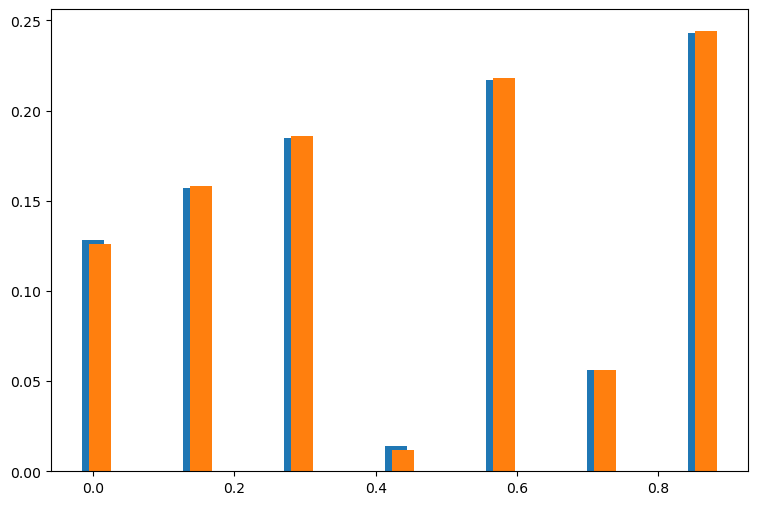

In [667]:
len_x=np.arange(0, 1, 1/7)
x1=len_x
x2=len_x+0.01
y1 =p_j
y2 =p_x

fig, ax = plt.subplots()

ax.bar(x1, y1, width=0.03 )
ax.bar(x2, y2, width=0.03)
fig.set_figwidth(9)   
fig.set_figheight(6)    

plt.show()

Лабораторная работа 3
Моделирование непрерывной случайной величины

Моделирование экспоненциальной случайной величины

In [719]:
def exponentialDistribution(z,lamd):
    x=[]
    for el in z:
        x.append(-math.log(el)/lamd)
    return(x)

In [720]:
def uniformDistribution(z, A,B):
    x=[]
    for el in z:
        x.append(A+(B-A)*el)
    return(x)

In [746]:
def erlangDistribution(z,lamd,k):
    x=[math.log(el) for el in z]
    x=[sum(x[i:i+k]) for i in range(len(x))]
    x=[-el/lamd for el in x]
    return x

In [722]:
def normalDistribution(z):
    m=1.5
    si=2
    standartX=[math.sqrt(-2*math.log(z[i]))*math.sin(2*math.pi*z[i+1]) for i in range(len(z)-1)]
    x=[el*si+m for el in standartX]
    return x

In [723]:
def weibullDistribution(z,alf,bet):
    x=[]
    for el in z:
        x.append(bet*pow(-math.log(el),(1/alf)))
    return x

In [758]:
k=3
lamd=4
A=0
B=1
alf=8
bet=25
expX=exponentialDistribution(z,lamd)
uniX=uniformDistribution(z, A,B)
erlX=erlangDistribution(z,lamd,k)
normX=normalDistribution(z)
weibX=weibullDistribution(z,alf,bet)
print('Экспоненциальное распределение','\n', expX[:30],'\n\n','Расвномерное распределение','\n', uniX[:30],'\n\n',
      'Распределение Эрланга','\n', erlX[:30],'\n\n', 'Нормальное распределение','\n', normX[:30],'\n\n',
      'Распределение Вейбулла','\n', weibX[:30],'\n\n')

Экспоненциальное распределение 
 [1.9061547465398496, 0.49656607920641316, 0.1471176231022156, 1.3568486022057948, 0.3621879290134093, 0.0008559558373884025, 0.80754245787174, 0.5433951331484245, 0.0078111982595269035, 0.25823631353768506, 0.9331996720121929, 0.0810365429728999, 0.39788319109014925, 0.3838935276781381, 0.16917047938610738, 0.04582464911044531, 0.016004455847710437, 0.13847371972478043, 0.17697599145144735, 0.20417101061486806, 0.43953773230652543, 0.20863043766137346, 0.005804162893916248, 0.1488828555024341, 0.024475356201673154, 0.057838972848890134, 0.009834476880068216, 0.45714030884850665, 0.48954807451174154, 0.10660885226436381] 

 Расвномерное распределение 
 [0.00048828125, 0.13720703125, 0.55517578125, 0.00439453125, 0.23486328125, 0.99658203125, 0.03955078125, 0.11376953125, 0.96923828125, 0.35595703125, 0.02392578125, 0.72314453125, 0.20361328125, 0.21533203125, 0.50830078125, 0.83251953125, 0.93798828125, 0.57470703125, 0.49267578125, 0.44189453125, 0.1723

(array([269., 122.,  59.,  27.,  11.,   6.,   2.,   2.,   0.,   2.]),
 array([8.55955837e-04, 1.91385835e-01, 3.81915714e-01, 5.72445593e-01,
        7.62975472e-01, 9.53505351e-01, 1.14403523e+00, 1.33456511e+00,
        1.52509499e+00, 1.71562487e+00, 1.90615475e+00]),
 <BarContainer object of 10 artists>)

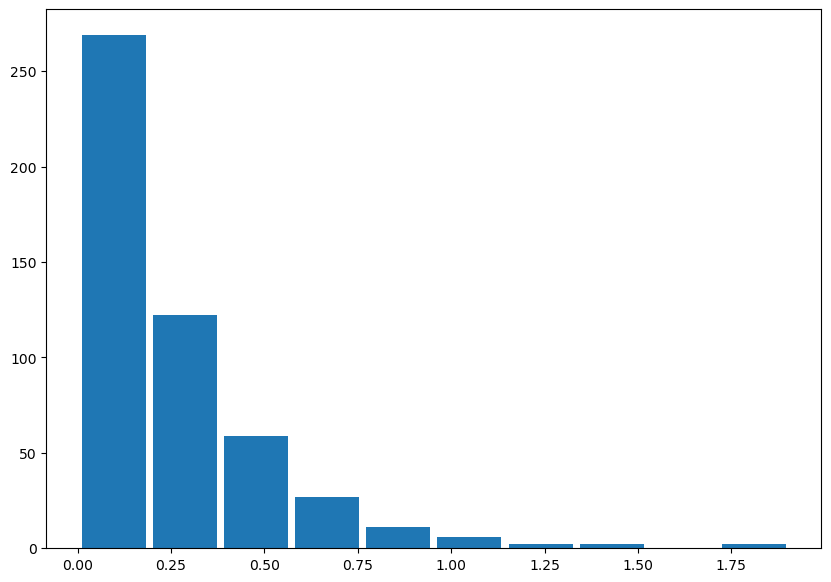

In [725]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(expX,rwidth=0.9)

(array([50., 49., 49., 49., 52., 48., 51., 49., 52., 51.]),
 array([4.88281250e-04, 1.00097656e-01, 1.99707031e-01, 2.99316406e-01,
        3.98925781e-01, 4.98535156e-01, 5.98144531e-01, 6.97753906e-01,
        7.97363281e-01, 8.96972656e-01, 9.96582031e-01]),
 <BarContainer object of 10 artists>)

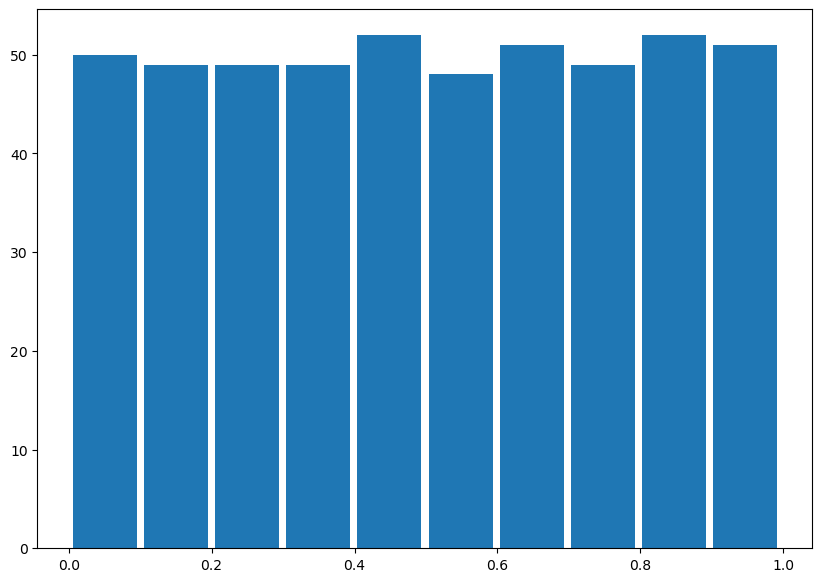

In [726]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(uniX, rwidth=0.9)

(array([ 72., 127., 119.,  83.,  49.,  28.,  10.,   8.,   1.,   3.]),
 array([0.0595154 , 0.31705644, 0.57459749, 0.83213853, 1.08967957,
        1.34722062, 1.60476166, 1.86230271, 2.11984375, 2.3773848 ,
        2.63492584]),
 <BarContainer object of 10 artists>)

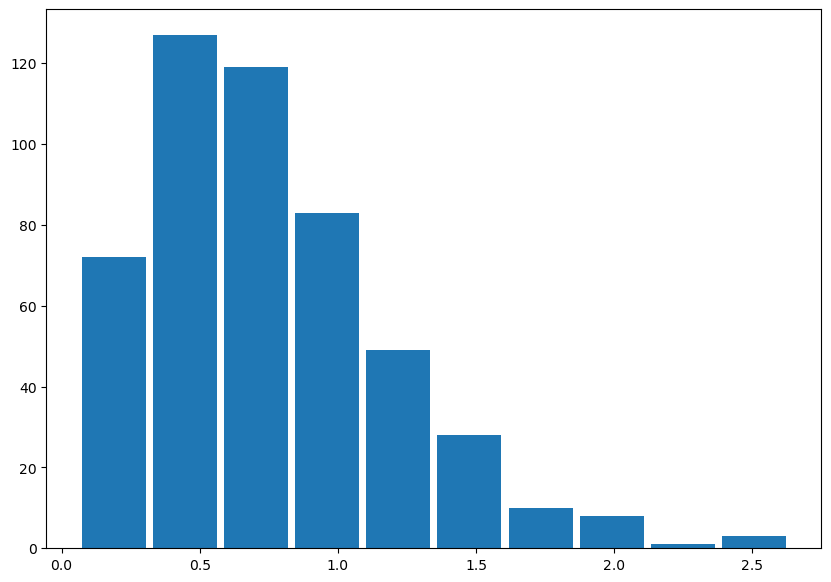

In [748]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(erlX, rwidth=0.9)

(array([  8.,  24.,  57., 100., 121.,  92.,  61.,  25.,   5.,   6.]),
 array([-3.88703745, -2.69237945, -1.49772145, -0.30306345,  0.89159455,
         2.08625255,  3.28091055,  4.47556855,  5.67022655,  6.86488455,
         8.05954255]),
 <BarContainer object of 10 artists>)

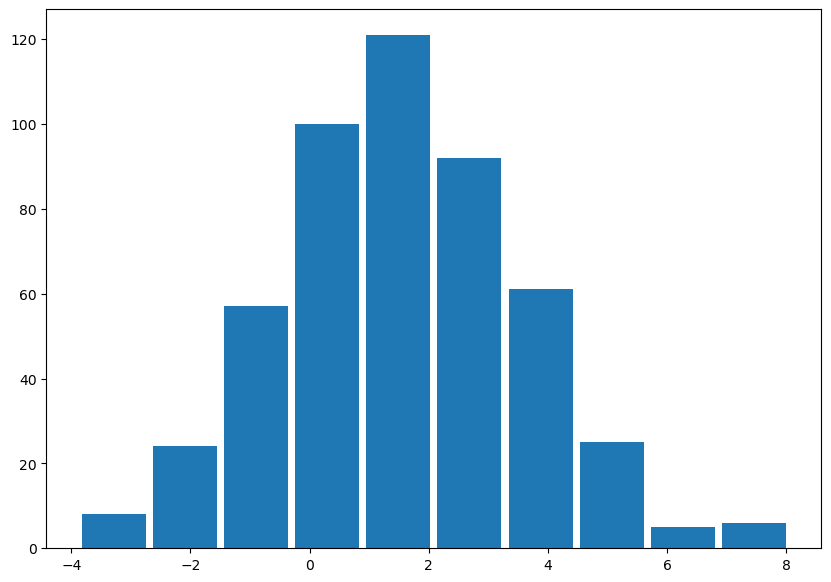

In [710]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(normX, rwidth=0.9)

(array([  6.,  10.,  24.,  45.,  78., 110., 112.,  80.,  29.,   6.]),
 array([12.29571894, 14.28882774, 16.28193653, 18.27504533, 20.26815413,
        22.26126292, 24.25437172, 26.24748052, 28.24058931, 30.23369811,
        32.22680691]),
 <BarContainer object of 10 artists>)

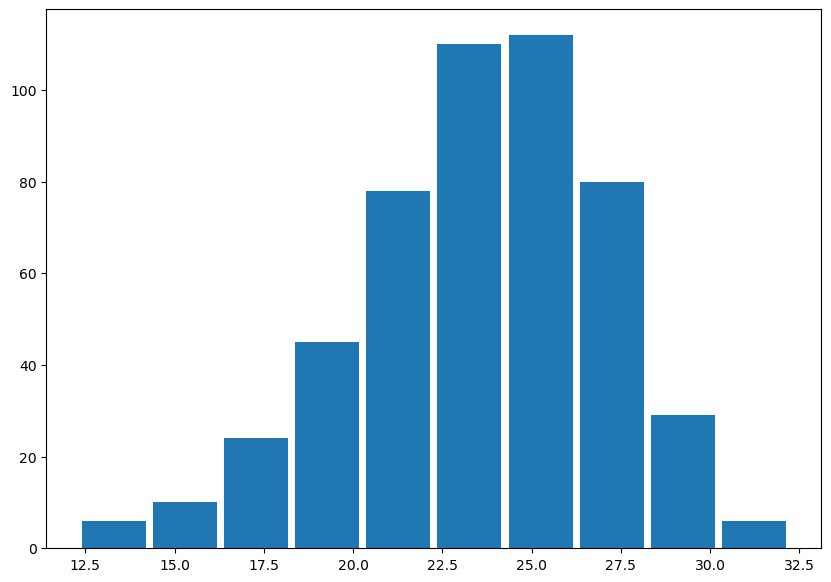

In [711]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(weibX, rwidth=0.9)

In [729]:
def getMean(lamd, A,B,k,alf,bet):
    expMean=1/lamd
    uniMean=A +(B-A)/2
    erlMean=k/lamd
    weibMean=bet*math.gamma(1+1/alf)
    return(expMean,uniMean,erlMean,weibMean)

In [749]:
means=getMean(lamd, A,B,k,alf,bet)
means

(0.25, 0.5, 0.75, 23.543567496242538)

In [750]:
def gerVar(lamd, A,B,k,alf,bet):
    expVar=1/pow(lamd,2)
    uniVar= pow(B-A, 2)/12
    erlVar=k/pow(lamd,2)
    weibVar=pow(bet,2)*(math.gamma(1+2/alf)-pow(math.gamma(1+1/alf),2))
    return(expVar,uniVar,erlVar,weibVar)

In [751]:
vars=gerVar(lamd, A,B,k,alf,bet)
vars

(0.0625, 0.08333333333333333, 0.1875, 12.201977709545217)

In [752]:
def getEmpiricalMeans(x1,x2,x3,x4,x5): 
    expMean=np.mean(x1)
    uniMean=np.mean(x2)
    erlMean=np.mean(x3)
    normMean=np.mean(x4)
    weibMean=np.mean(x5)
    return(expMean, uniMean,erlMean,normMean,weibMean)

In [753]:
empiricalMeans=getEmpiricalMeans(expX,uniX,erlX,normX,weibX)
empiricalMeans

(0.25179526491389553,
 0.50056640625,
 0.7467680435971144,
 1.5396064625630126,
 23.55326198507099)

In [754]:
def getEmpiricalVars(x1,x2,x3,x4,x5): 
    expVar=np.var(x1)
    uniVar=np.var(x2)
    erlVar=np.var(x3)
    normVar=np.var(x4)
    weibVar=np.var(x5)
    return(expVar,uniVar,erlVar,normVar,weibVar)

In [760]:
empiricalVars=getEmpiricalVars(expX,uniX,erlX,normX,weibX)
empiricalVars

(0.06740522049520219,
 0.08334734497070312,
 0.19012451095120486,
 4.0946339377460355,
 12.08449146983073)